## Final Project Submission

Please fill out:
* Student name: Morvine Awuor Otieno 
* Student pace: Full Time Remote
* Scheduled project review date/time: 4th October 2025
* Instructor name: Nikita Njoroge 
* Blog post URL:


In [15]:
import pandas as pd

# Load dataset
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)


In [30]:
type(df)

pandas.core.frame.DataFrame

In [23]:
# Preview data
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [22]:
df.shape

(90348, 31)

In [29]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [24]:
# Statistics summary for numeric columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [28]:
# columns
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

### 3. Data Preparation


In [54]:
# Rename columns for clarity
df.rename(columns={
   "Model": "Aircraft_Type",
    "Make": "Manufacturer",
    "Event.Date": "Accident_Date",
    "Injury.Severity": "Accident_Severity"
}, inplace=True)

In [56]:
# Convert Accident_Date to datetime
df["Accident_Date"] = pd.to_datetime(df["Accident_Date"], errors="coerce")


In [62]:
# Drop rows with missing critical info
df_clean = df.dropna(subset=["Aircraft_Type", "Manufacturer", "Accident_Date"]).copy()

In [63]:
df['Accident_Date'].dtype


dtype('<M8[ns]')

In [65]:
df["Accident_Date"].head()

0   1948-10-24
1   1962-07-19
2   1974-08-30
3   1977-06-19
4   1979-08-02
Name: Accident_Date, dtype: datetime64[ns]

In [66]:
 # Extract year for trend analysis
df_clean['Year'] = df_clean['Accident_Date'].dt.year

In [70]:
df_clean.head()[["Accident_Date", "Year"]]

,Accident_Date,Year
0,1948-10-24,1948
1,1962-07-19,1962
2,1974-08-30,1974
3,1977-06-19,1977
4,1979-08-02,1979


#### Data Preparation Explanation

We renamed columns to improve readability and converted accident dates to datetime format. Rows missing critical information such as aircraft type, manufacturer, or accident date were removed to ensure data quality for analysis. We also extracted the accident year to analyze trends over time.

In [72]:
# Accident counts by aircraft type

accidents_by_type = df_clean['Aircraft_Type'].value_counts()
accidents_by_type

Aircraft_Type
152                    2367
172                    1756
172N                   1164
PA-28-140               932
150                     829
                       ... 
SNJ-5C                    1
QUICKSILVER SPORT 2       1
727-2Q8                   1
WMF                       1
M-8 EAGLE                 1
Name: count, Length: 12311, dtype: int64

In [75]:
# Accident counts by manufacturer
accidents_by_manufacturer = df_clean['Manufacturer'].value_counts()
accidents_by_manufacturer

Manufacturer
Cessna           22226
Piper            12029
CESSNA            4919
Beech             4330
PIPER             2840
                 ...  
Conrad Menzel        1
Blucher              1
Gideon               1
Brault               1
ROYSE RALPH L        1
Name: count, Length: 8224, dtype: int64

In [76]:
# Accident trend over years
accidents_per_year = df_clean.groupby('Year').size()
accidents_per_year

Year
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3573
1983    3556
1984    3456
1985    3096
1986    2879
1987    2828
1988    2730
1989    2543
1990    2517
1991    2462
1992    2352
1993    2313
1994    2256
1995    2308
1996    2187
1997    2148
1998    2224
1999    2208
2000    2218
2001    2060
2002    2020
2003    2080
2004    1951
2005    2029
2006    1848
2007    2010
2008    1887
2009    1770
2010    1778
2011    1842
2012    1819
2013    1557
2014    1534
2015    1581
2016    1663
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
dtype: int64

In [102]:
# Accident severity distribution
severity_counts = df_clean['Accident_Severity'].value_counts()
severity_counts

Accident_Severity
Non-Fatal     67305
Fatal(1)       6159
Fatal          5248
Fatal(2)       3703
Incident       2214
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: count, Length: 109, dtype: int64

### 5.Visualization)

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

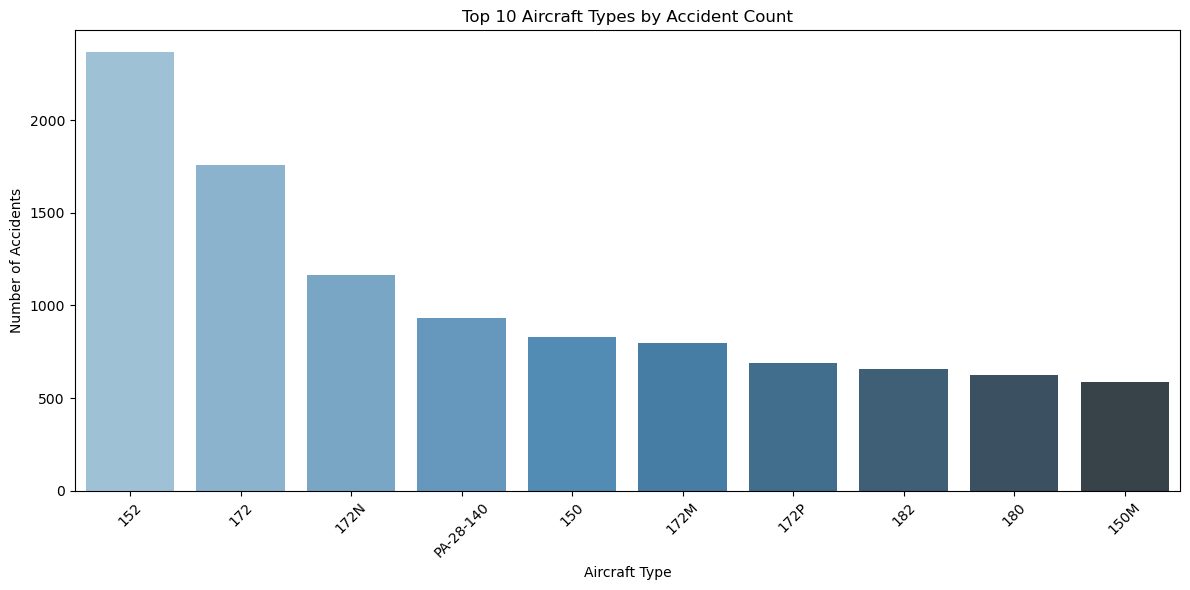

In [89]:
# Bar chart: Top 10 Aircraft Types by Accident Count

plt.figure(figsize=(12,6))
sns.barplot(x=accidents_by_type.index[:10], y=accidents_by_type.values[:10], palette='Blues_d')
plt.title('Top 10 Aircraft Types by Accident Count')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
import numpy as np

accidents_per_year = accidents_per_year.replace([np.inf, -np.inf], np.nan).dropna()


C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


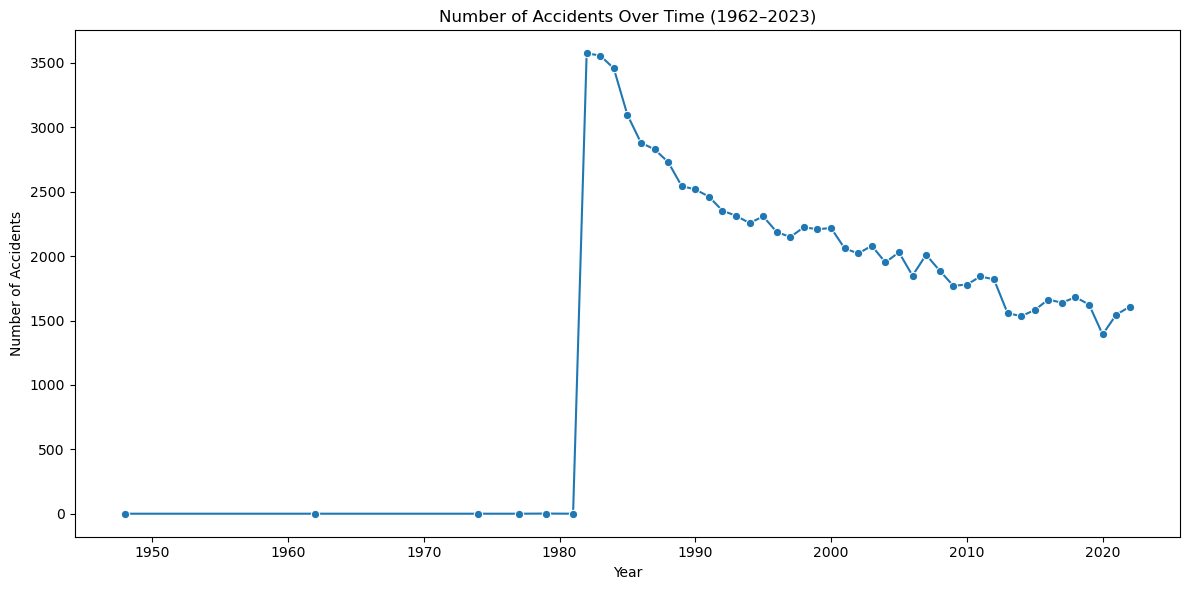

In [98]:
# Line chart: Accidents Over Time

plt.figure(figsize=(12,6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values, marker="o")
plt.title("Number of Accidents Over Time (1962–2023)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

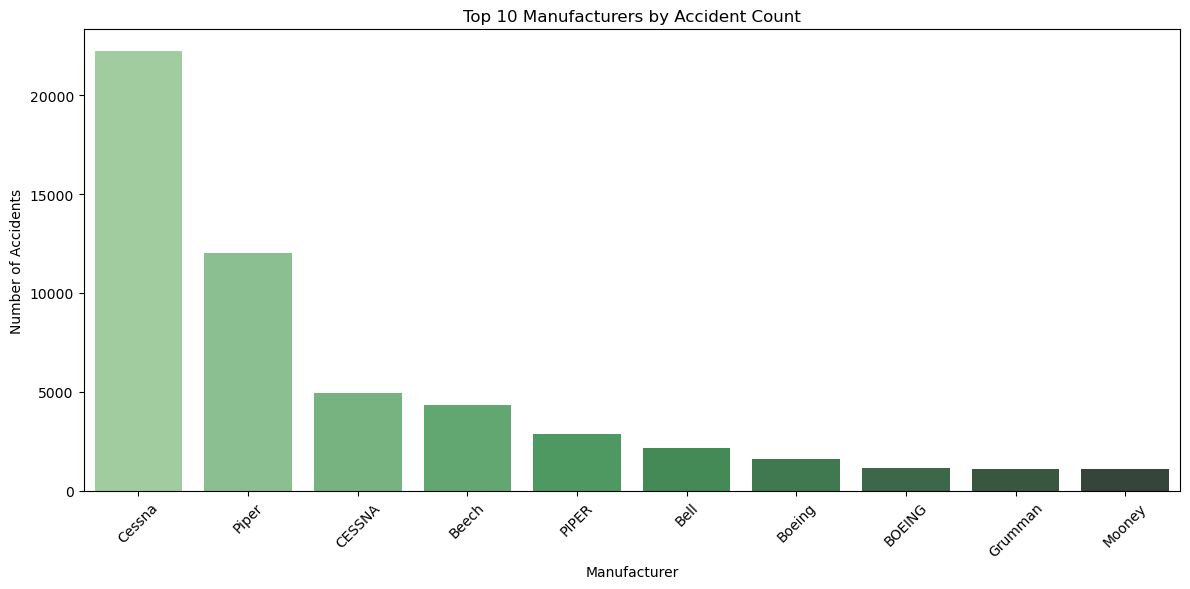

In [91]:
# Bar chart: Accident Counts by Manufacturer (Top 10)
plt.figure(figsize=(12,6))
sns.barplot(x=accidents_by_manufacturer.index[:10], y=accidents_by_manufacturer.values[:10], palette='Greens_d')
plt.title('Top 10 Manufacturers by Accident Count')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

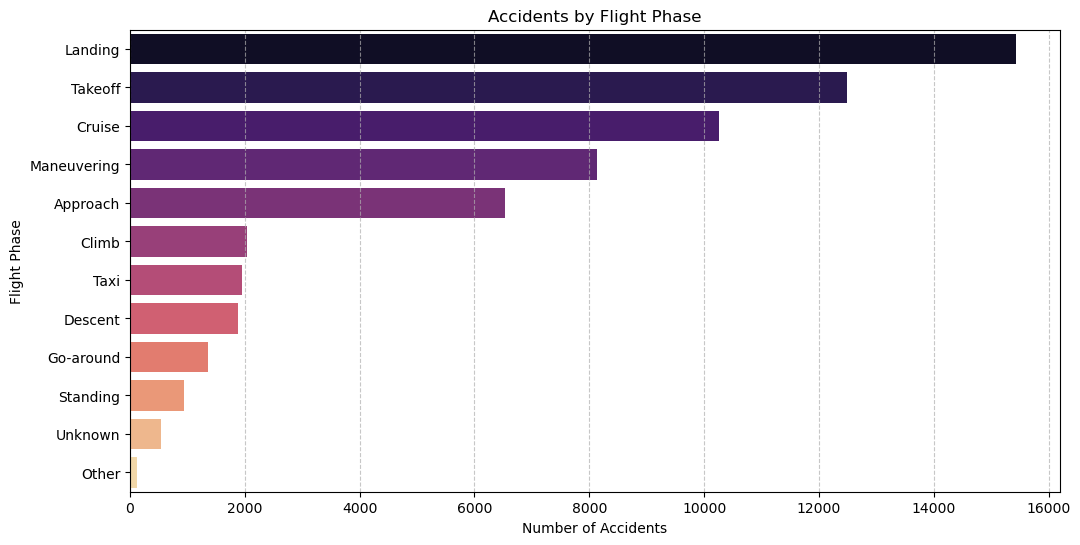

In [101]:
plt.figure(figsize=(12, 6))

# Count of accidents per flight phase
flight_phase_accidents = df_clean['Broad.phase.of.flight'].value_counts().reset_index()
flight_phase_accidents.columns = ['Flight Phase', 'Accident Count']

# Plot
sns.barplot(x='Accident Count', y='Flight Phase', data=flight_phase_accidents, palette='magma')

# Labels & Title
plt.xlabel('Number of Accidents')
plt.ylabel('Flight Phase')
plt.title('Accidents by Flight Phase')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()